In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

# Assignment(6-6)

## Initializations

In [2]:
house = pd.read_csv("house_features_for_model.csv")
price = pd.read_csv("house_prices_for_model.csv")

X= house
Y= price


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))


Eğitim kümesindeki gözlem sayısı : 1103
Test kümesindeki gözlem sayısı   : 276


In [4]:
model = sm.OLS(y_train, X_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     315.0
Date:                Thu, 23 Apr 2020   Prob (F-statistic):               0.00
Time:                        19:28:36   Log-Likelihood:                -13039.
No. Observations:                1103   AIC:                         2.611e+04
Df Residuals:                    1086   BIC:                         2.620e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     7.907e+04   1.91e+04      4.147      0.000    4.17e+04    1.16e+05
Neighborhood_Crawfor      3.567e+04   5418.485      6.582      0.000     2.5e+04    4.63e+04
Neighborhood_NoRidge      6.342e+04   6558.266      9.670      0.000    5.05e+04    7.63e+04
Neighborhood_NridgHt      2.982e+04   5218.836      5.714      0.000    1.96e+04    4.01e+04
Neighborhood_StoneBr      5.477e+04   7823.646      7.000      0.000    3.94e+04    7.01e+04
Neighborhood_Veenker      2.052e+04   1.14e+04      1.806      0.071   -1774.446    4.28e+04
Condition2_PosN          -1.498e+05   2.43e+04     -6.156      0.000   -1.97e+05   -1.02e+05
Exterior1st_BrkFace       1.686e+04   5523.395      3.053      0.002    6023.583    2.77e+04
Fireplaces                1.097e+04   1791.719      6.122      0.000    7452.668    1.45e+04
GarageArea                  34.2444      9.879      3.466      0.001      14.860      53.629
OverallQual              -4.162e+04   5821.414     -7.150      0.000    -5.3e+04   -3.02e+04
OverallCond               8322.2997   1043.358      7.976      0.000    6275.075    1.04e+04
GarageCars                9123.7944   3053.449      2.988      0.003    3132.467    1.51e+04
TotRmsAbvGrd             -1.335e+05   1.29e+04    -10.368      0.000   -1.59e+05   -1.08e+05
OverallQual * LotArea        0.1245      0.015      8.478      0.000       0.096       0.153
YearBuilt * TotRmsAbvGrd    72.3549      6.614     10.939      0.000      59.376      85.334
OverallQual**2            5015.7520    463.251     10.827      0.000    4106.783    5924.721
==============================================================================
Omnibus:                      289.291   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19408.350
Skew:                          -0.039   Prob(JB):                         0.00
Kurtosis:                      23.550   Cond. No.                     2.54e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
X_test = sm.add_constant(X_test)

Y_test_pred = model.predict(X_test)

Y_pred = model.predict(X)

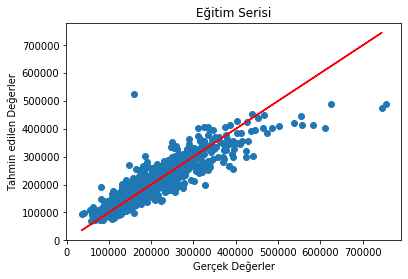

In [6]:
plt.scatter(Y, Y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin edilen Değerler")
plt.title("Eğitim Serisi")
plt.show()

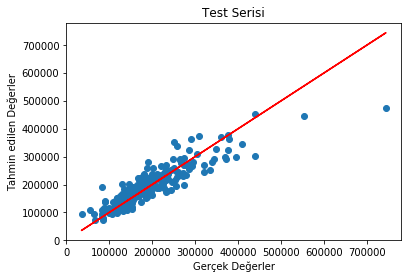

In [7]:
plt.scatter(y_test, Y_test_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin edilen Değerler")
plt.title("Test Serisi")
plt.show()

Maybe we can winsorize or do log transformation for outliners but generally our model looks good.

In [16]:
print("Ortalama Mutlak Hata (MSE)        : {}".format(mean_absolute_error(y_test.iloc[:,0], Y_test_pred)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test.iloc[:,0], Y_test_pred)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test.iloc[:,0], Y_test_pred)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test.iloc[:,0] - Y_test_pred) / y_test.iloc[:,0])) * 100))

Ortalama Mutlak Hata (MSE)        : 24056.685189813266
Ortalama Kare Hata (MSE)          : 1299948266.7487316
Kök Ortalama Kare Hata (RMSE)     : 36054.79533638669
Ortalama Mutlak Yüzde Hata (MAPE) : 13.699051153079298
